# Handwritten digit recognition using CNN

In [6]:
import numpy as np
import keras
import keras.layers as layers
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

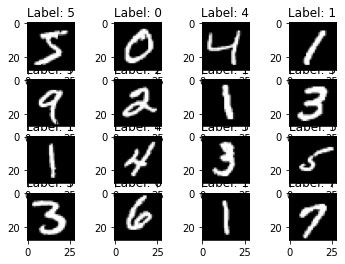

training set shape: (60000, 28, 28) 
test set shape: (10000, 28, 28)
training set shape: (60000, 32, 32) 
test set shape: (10000, 32, 32)
training set shape: (60000, 32, 32, 1) 
test set shape: (10000, 32, 32, 1)
First 10 labels:  [5 0 4 1 9 2 1 3 1 4]
First 10 one-hot labels:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [7]:
def load_digits2d(show_sample = True):
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    
    #show first 16 images
    if show_sample == True:
        nImg = 4
        for i in range(nImg*nImg):
            plt.subplot(nImg, nImg, i+1)
            plt.imshow(x_train[i], cmap = 'Greys_r')
            plt.title('Label: %d' % (y_train[i]))
        plt.show()
    
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_digits2d(show_sample = True)
print('training set shape:', x_train.shape, '\r\ntest set shape:', x_test.shape)

x_train_1 = np.pad(x_train, ((0,0), (2,2),(2,2)), 'constant')
x_test_1 = np.pad(x_test, ((0,0), (2,2),(2,2)), 'constant')
print('training set shape:', x_train_1.shape, '\r\ntest set shape:', x_test_1.shape)

x_train_2 = np.expand_dims(x_train_1, axis = 3)
x_test_2 = np.expand_dims(x_test_1, axis = 3)

print('training set shape:', x_train_2.shape, '\r\ntest set shape:', x_test_2.shape)

y_train_onehot = keras.utils.to_categorical(y_train)
print('First 10 labels: ', y_train[:10])
print('First 10 one-hot labels: ', y_train_onehot[:10])

In [8]:
# Creating Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (32,32,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',  activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1664      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


history = model.fit(x_train_2, y_train_onehot,
                    batch_size=64, epochs=10,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 453s 604ms/step - loss: 0.1387 - accuracy: 0.9569 - val_loss: 0.0665 - val_accuracy: 0.9790
Epoch 2/10
750/750 [==============================] - 430s 574ms/step - loss: 0.0551 - accuracy: 0.9827 - val_loss: 0.0443 - val_accuracy: 0.9869
Epoch 3/10
750/750 [==============================] - 428s 571ms/step - loss: 0.0383 - accuracy: 0.9875 - val_loss: 0.0402 - val_accuracy: 0.9884
Epoch 4/10
750/750 [==============================] - 430s 574ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0418 - val_accuracy: 0.9885
Epoch 5/10
750/750 [==============================] - 454s 606ms/step - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0516 - val_accuracy: 0.9846
Epoch 6/10
750/750 [==============================] - 545s 727ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0295 - val_accuracy: 0.9917
Epoch 7/10
750/750 [==============================] - 583s 777ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0303 -

In [10]:
# test accuray
score = model.evaluate(x_test_2, keras.utils.to_categorical(y_test))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 28s 89ms/step - loss: 0.0208 - accuracy: 0.9935
Test loss: 0.020778153091669083
Test accuracy: 0.9934999942779541
